### Grouping customers based on their purchase history

In [24]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data=pd.read_csv(r"C:\Users\USER\Desktop\ML Internship\Mall_Customers.csv")

In [14]:
#Displaying our data
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
#Complete information about the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [17]:
#Checking and removing null values
print(data.isnull().values.sum())
data = data.replace(" ",np.NaN)
data=data.fillna(data.mean(numeric_only ="True"))
print(data.isnull().values.sum())


0
0


In [18]:
#Converting string into numeric value
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Level')

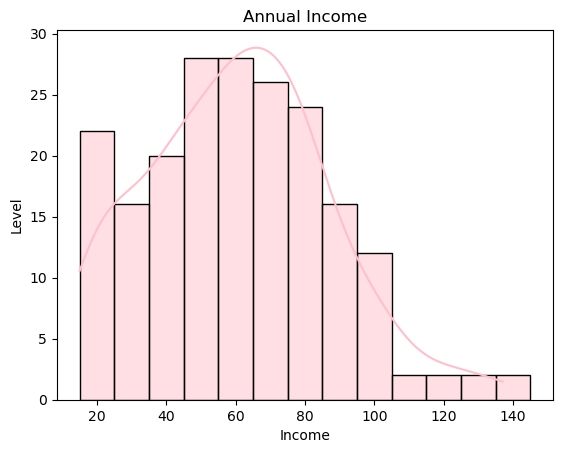

In [19]:
sns.histplot(data['Annual Income (k$)'], kde=True, bins=10, binwidth=10, color="pink", edgecolor="black")

plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Level")

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Level')

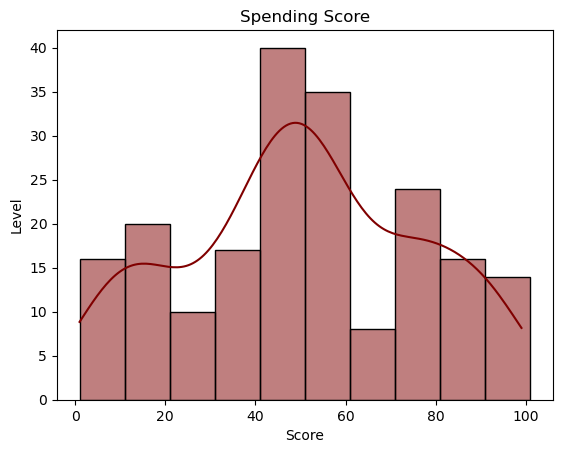

In [20]:
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=10, binwidth=10, color="maroon", edgecolor="black")

plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Level")

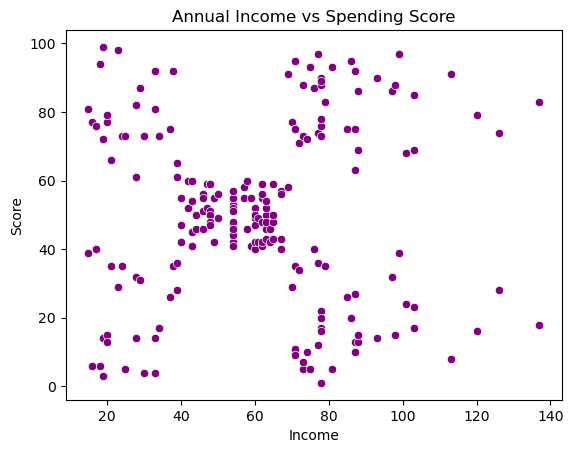

In [21]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", color="purple")
plt.title("Annual Income vs Spending Score")
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

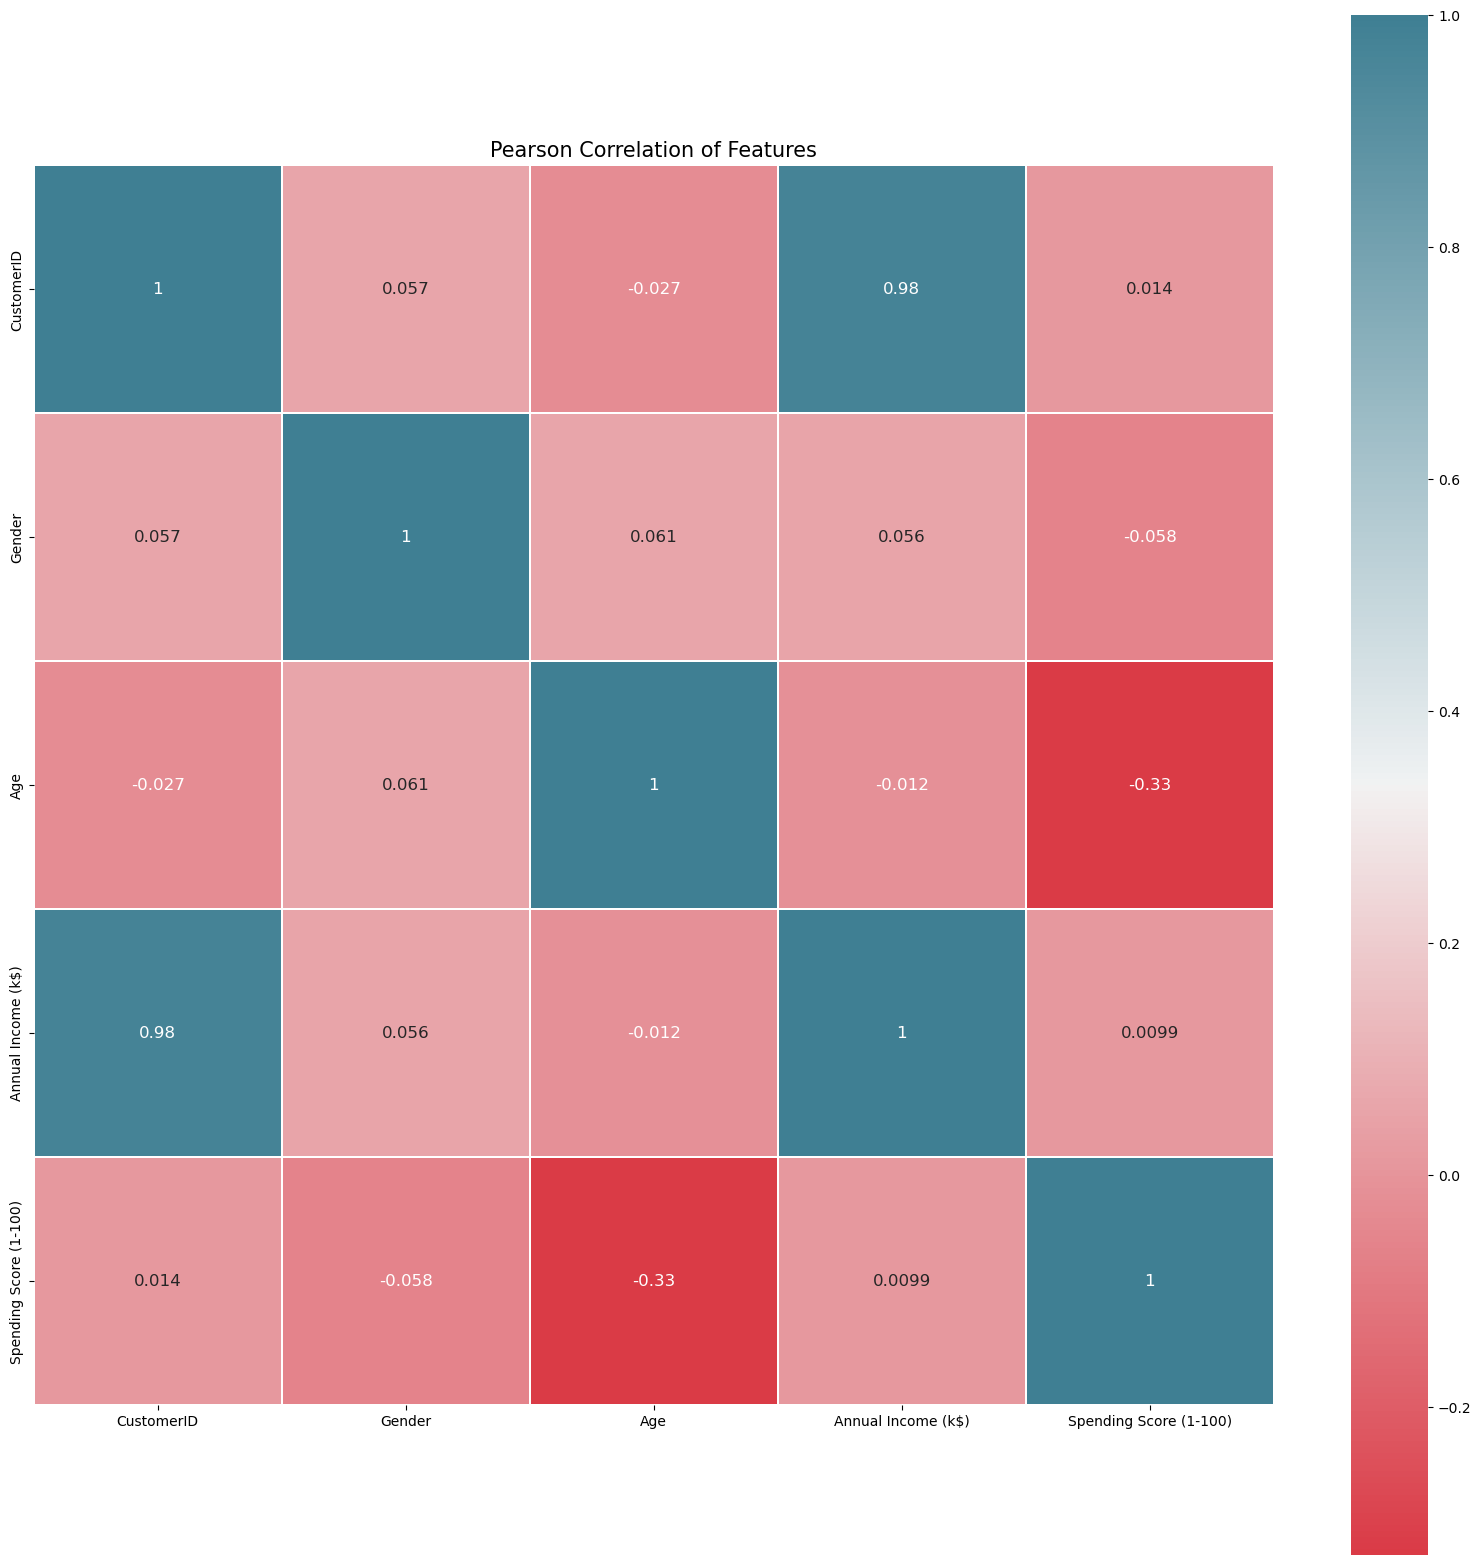

In [22]:
#Plotting a heatmap to figure out the correlation
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(data.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when 

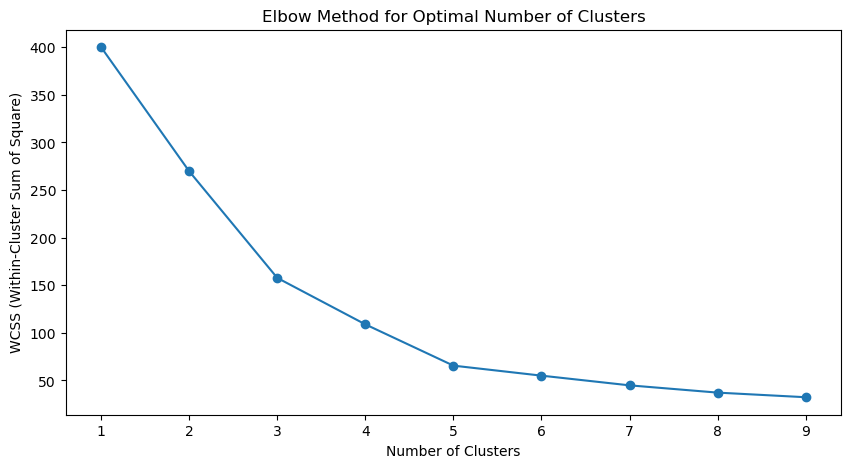

In [36]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the original data
data['Cluster'] = clusters
centers = kmeans.cluster_centers_

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)  # Set n_init=10
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method result
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()




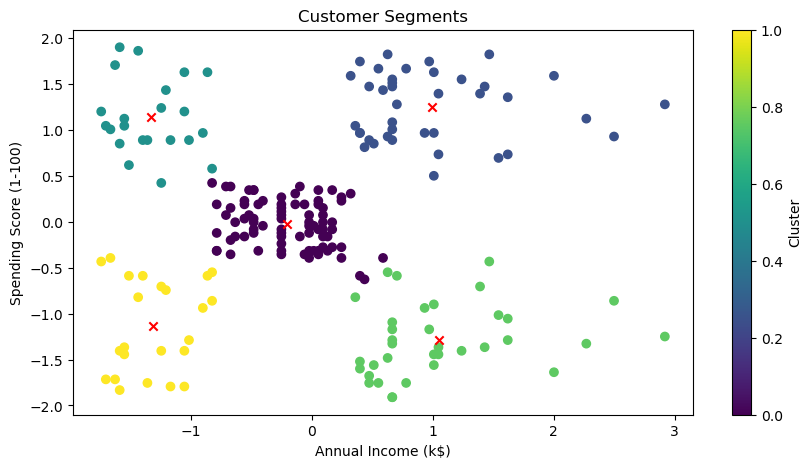

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

#### Therefore, the customers have been successfully divided into 5 groups with the help of K-means algorithm.